## NYC Taxi Fare Prediction using Eexploratory Data Analysis and Machine Learning

Source Dataset: https://data.cityofnewyork.us/Transportation/2017-Yellow-Taxi-Trip-Data/biws-g3hs/about_data  
Data Provided By: Taxi and Limousine Commission (TLC)  
Dataset Owner: NYC OpenData  
  
**Objective:** Based on 2017 Yellow Taxi Trip Data, we want to -  
    - Draw insights about data hygiene, relationships between variables and any abnormalities.  
    - Identify and create a model to estimate Yellow Taxi fare for passengers, expected in 2018.

#### Import libraries

In [128]:
pd.set_option('display.max_columns', None)

# Basic imports for data analysis
import numpy as np
import pandas as pd
import datetime as dt

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for data modeling
from sklearn.model_selection import train_test_split


#### Review Data Available

In [3]:
# Load dataset
df_original= pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')
df_original.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [4]:
# Variable overview
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

**Observations**:
- Compared to the original dataset, which contains 113M records, we are working with a smaller subset of the data with 22,699 records as part of practice.  
- The column 'Unnamed: 0' has not been mentioned in the data dictionary and is likely to random no. generated as index.
- Columns 'tpep_pickup_datetime' and 'tpep_dropoff_datetime' are date/time variables, which would need to be converted to the correct format.

In [5]:
# Summary statistics
df_original.describe(include= 'all')

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
unique,NaN,NaN,22687,22688,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,04/15/2017 6:05:19 PM,10/18/2017 8:07:45 PM,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,2,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.675849e+07,1.556236,NaN,NaN,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,NaN,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,NaN,NaN,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,NaN,NaN,1.000000,1.610000,1.000000,NaN,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,NaN,NaN,2.000000,3.060000,1.000000,NaN,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000


**Observations**:
- There seems to be outlying values for fare_amount, trip_distance, total_amount etc. as the max. value of ~1000 USD is much higher than the mean.
- We have negative values in variables fare_amount, exttra etc.

Based on our observations from above, we can plan our EDA approach as below:
- Data Cleaning
    - Check/eliminate/deal with duplicates
    - Check/eliminate/deal with Nulls
    - Modify columns as needed
    - Identify outliers, isolate to assess how to deal with them
    - Check for incorrect values

- Draw insights from variables
    - Derive 'trip_duration' column based on date/time values provided
    - Can trip distance and trip duration be correlated so we keep just one?
    - Does the data sample capture all kind of rate code IDs? Any weird values?
    - Is there any variance in nos. observed between different data providers (vendor ID)?
    - Distribution of values in variables:  passenger count, fare amount, trip distance, trip duration
    - Any impact on data values between 'store' vs. 'forward' flagged data?
    - Which payment type has been used mostly? For similar trip distance/duration, is there any impact of payment type on fare amount?

#### Exploratory Data Analysis

##### Data Cleaning

In [6]:
# Check for duplicates
df_original[df_original.duplicated()]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount


In [7]:
# Check for Nulls
df_original.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

No rows were found to be duplicated and no columns have null values.

In [8]:
# Remove column 'Unnamed: 0' as there is no context provided about the data
df_edit= df_original.drop(columns= ['Unnamed: 0'])
df_edit.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [9]:
# # Correct format for date time columns
df_edit['tpep_pickup_datetime'] = pd.to_datetime(df_edit['tpep_pickup_datetime'])
df_edit['tpep_dropoff_datetime'] = pd.to_datetime(df_edit['tpep_dropoff_datetime'])

# Rename date time columns
df_edit= df_edit.rename(columns= {'tpep_pickup_datetime':'pickup_datetime'})
df_edit= df_edit.rename(columns= {'tpep_dropoff_datetime':'dropoff_datetime'})

df_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               22699 non-null  int64         
 1   pickup_datetime        22699 non-null  datetime64[ns]
 2   dropoff_datetime       22699 non-null  datetime64[ns]
 3   passenger_count        22699 non-null  int64         
 4   trip_distance          22699 non-null  float64       
 5   RatecodeID             22699 non-null  int64         
 6   store_and_fwd_flag     22699 non-null  object        
 7   PULocationID           22699 non-null  int64         
 8   DOLocationID           22699 non-null  int64         
 9   payment_type           22699 non-null  int64         
 10  fare_amount            22699 non-null  float64       
 11  extra                  22699 non-null  float64       
 12  mta_tax                22699 non-null  float64       
 13  t

In [10]:
# Creating a trip duration column to make more sense of pickup and dropoff times
df_edit['trip_duration']= round((df_edit['dropoff_datetime'] - df_edit['pickup_datetime'])/np.timedelta64(1,'m'),3)

# Creating columns to extract month and date for each trip
df_edit['month']= df_edit['pickup_datetime'].dt.month_name().str.slice(stop= 3)
df_edit['day']= df_edit['pickup_datetime'].dt.day_name().str.slice(stop= 3)

df_edit.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,month,day
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.067,Mar,Sat
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500,Apr,Tue
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200,Dec,Fri
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250,May,Sun
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.717,Apr,Sat


Checking for outliers

In [11]:
df_edit.describe()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
count,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.556236,2017-06-29 07:32:48.973126656,2017-06-29 07:49:49.799726848,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,17.013776
min,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-16.983000
25%,1.000000,2017-03-30 03:09:38.500000,2017-03-30 03:11:20.500000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000
50%,2.000000,2017-06-23 12:35:57,2017-06-23 12:55:11,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.183000
75%,2.000000,2017-10-02 10:34:34,2017-10-02 10:53:47,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.383000
max,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1439.550000
std,0.496838,NaN,NaN,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,61.996481


Based on the range of values for each variable as we see above, we'll check the following ones for distribution: -
- Trip Distance
- Fare Amount
- Extra
- Tip Amount
- Tolls Amount
- Trip Duration

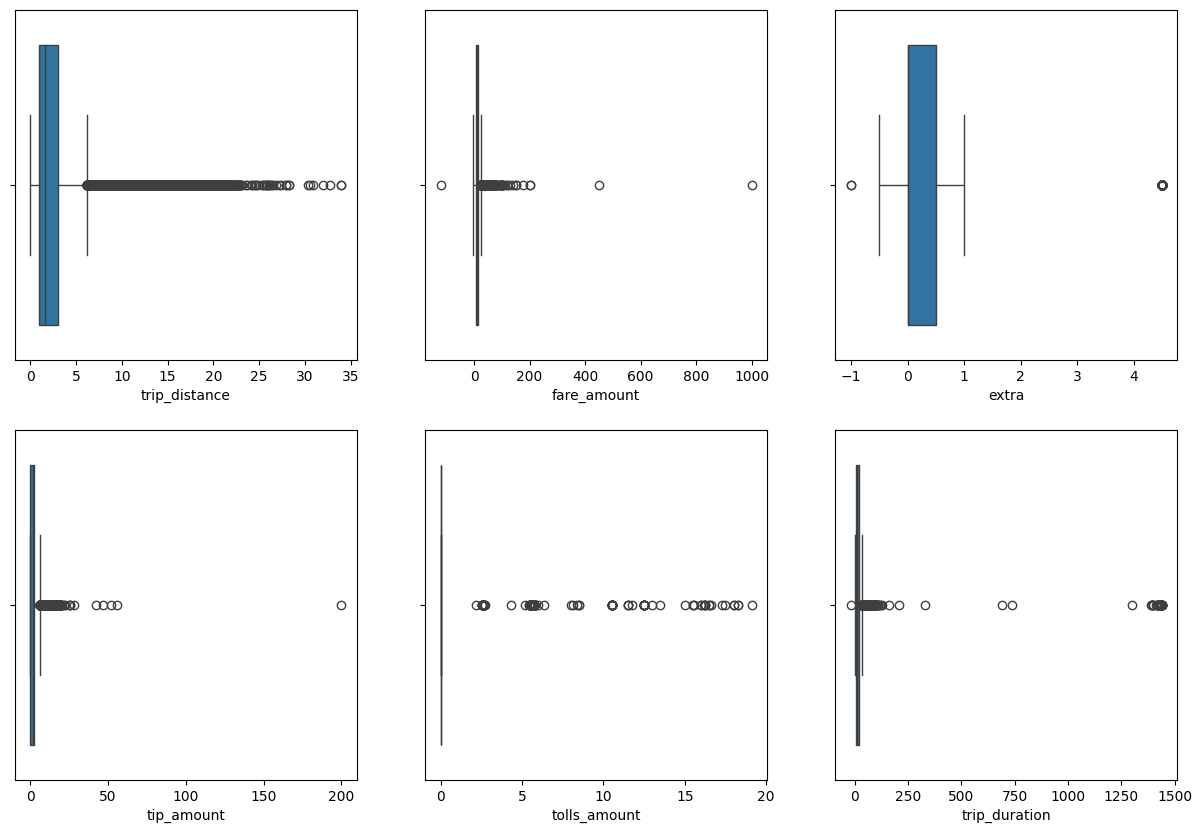

In [12]:
# Box Plot for the variables mentioned above
fig, axes = plt.subplots(2,3, figsize= (15,10))

sns.boxplot(x= df_edit['trip_distance'], ax= axes[0,0])
sns.boxplot(x= df_edit['fare_amount'], ax= axes[0,1])
sns.boxplot(x= df_edit['extra'], ax= axes[0,2])
sns.boxplot(x= df_edit['tip_amount'], ax= axes[1,0])
sns.boxplot(x= df_edit['tolls_amount'], ax= axes[1,1])
sns.boxplot(x= df_edit['trip_duration'], ax= axes[1,2])

plt.show()

*Key Observations*:
- trip_distance is generally between 0-5 miles, however, there seems to be a lot of extreme outlier values. Similarly for fare_amount, tip_amount, and trip_duration.
- We have negative values for fare_amount, extra, and possibly also trip duration. 

In [13]:
# Identify outliers for trip distance
tripdist_25 = df_edit['trip_distance'].quantile(0.25)
tripdist_75 = df_edit['trip_distance'].quantile(0.75)

iqr_tripdist = tripdist_75 - tripdist_25

tripdist_ll = tripdist_25 - (1.5 * iqr_tripdist)
tripdist_ul = tripdist_75 + (1.5 * iqr_tripdist)

print('Trip Distance Upper Limit:', '%.3f'% tripdist_ul)
print('Trip Distance Lower Limit:', '%.3f'% tripdist_ll)

Trip Distance Upper Limit: 6.165
Trip Distance Lower Limit: -2.115


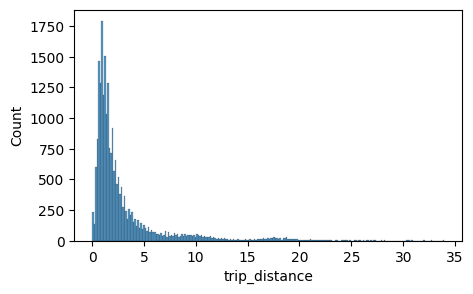

In [ ]:
# Plotting histogram for distribution of trip distance
plt.figure(figsize=(5,3))
sns.histplot(df_edit['trip_distance'])
plt.show()

The distribution of values for trip distance is skewed to the right. Hence causing a negative value for lower limit of outliers. We'll consider the following limits:
Lower Limit: 0  
Upper Limit: 6.165  
We'll check what percentage of records classify as outliers. 

In [22]:
# Create a mask for outliers
mask_tripdist= (df_edit['trip_distance'] < 0) | (df_edit['trip_distance'] > tripdist_ul)
df_edit[mask_tripdist].shape[0]/df_edit.shape[0] * 100

11.132649015375126

In [24]:
# Rows having 0 as trip distance
df_edit[df_edit['trip_distance'] == 0].shape

(148, 20)

In [34]:
# Second least value for trip distance
tripdist_min= np.sort(df_edit['trip_distance'].unique())[1]
tripdist_min

np.float64(0.01)

There are about 11% records wherein the trip distance is an outlying value. Instead of deleting records, we'll assign a value equal to lower or high limit, as applicable.
We also notice rows wherein trip distance= 0. As this doesn't make sense, we'll use the second least value of 0.01

In [36]:
# Impute second minimum value for trip distance 0
df_edit['trip_distance'] = np.where(df_edit['trip_distance'] == 0, tripdist_min, df_edit['trip_distance'])
df_edit[df_edit['trip_distance'] == 0].shape

(0, 20)

In [45]:
# Function to assign upper and lower limit values to outliers
def clean_outlier(data, col):
    ''' 
    The function will find upper and lower limit using:
    Lower Limit = 25th Percentile - (1.5 * I.Q.R)
    Upper Limit = 75th Percentile + (1.5 * I.Q.R)
    
    Arguments:
    data: DataFrame used
    col: Column name to be cleaned (text)
    '''
    col_25 = data[col].quantile(0.25)
    col_75 = data[col].quantile(0.75)

    col_iqr = col_75 - col_25

    col_ll = col_25 - (1.5 * col_iqr)
    col_ul = col_75 + (1.5 * col_iqr)

    data[col] = np.where(data[col] < col_ll, col_ll, data[col])
    data[col] = np.where(data[col] > col_ul, col_ul, data[col])

    print('25th Percentile:','%.3f'%col_25)
    print('75th Percentile:','%.3f'%col_75)
    print('Lower Limit:','%.3f'%col_ll)
    print('Upper Limit:','%.3f'%col_ul)

    return    data[col] 


In [46]:
# Clean Trip Distance Outliers
df_edit1 = df_edit.copy()
clean_outlier(df_edit1, 'trip_distance')

print('Shape of modified DF:',df_edit1[df_edit1['trip_distance'] > tripdist_ul].shape)
print('Trip dist max. value:', '%.3f'% df_edit1['trip_distance'].max())

25th Percentile: 0.990
75th Percentile: 3.060
Lower Limit: -2.115
Upper Limit: 6.165
Shape of modified DF: (0, 20)
Trip dist max. value: 6.165


In [ ]:
# Records with negative fare amount
df_edit1[df_edit1['fare_amount'] < 0].shape

(14, 20)

We'll run the clean_outlier function to assign limiting values to outliers.

In [60]:
# Clean Fare Amount Outliers
df_edit2 = df_edit1.copy()
clean_outlier(df_edit2, 'fare_amount')
print('')
print('Fare amount max. value:', '%.3f'% df_edit2['fare_amount'].max())
print('Fare amount min. value:', '%.3f'% df_edit2['fare_amount'].min())
print('Rows with negative fare:',df_edit2[df_edit2['fare_amount'] < 0].shape[0])

25th Percentile: 6.500
75th Percentile: 14.500
Lower Limit: -5.500
Upper Limit: 26.500

Fare amount max. value: 26.500
Fare amount min. value: -5.500
Rows with negative fare: 14


We'll replace negative values for fare to 0.

In [ ]:
# Remove negative fare amount value with 0
df_edit2['fare_amount'] = np.where(df_edit2['fare_amount'] < 0, 0, df_edit2['fare_amount'])
print('Rows with negative fare:',df_edit2[df_edit2['fare_amount'] < 0].shape[0])

Rows with negative fare: 0


We'll perform a similar assessment for trip duration

In [71]:
df_edit3 = df_edit2.copy()
clean_outlier(df_edit3, 'trip_duration')
print('')
print('Trip Duration max. value:', '%.3f'% df_edit3['trip_duration'].max())
print('Trip Duration min. value:', '%.3f'% df_edit3['trip_duration'].min())
print('Rows with negative duration:',df_edit3[df_edit3['trip_duration'] < 0].shape[0])

25th Percentile: 6.650
75th Percentile: 18.383
Lower Limit: -10.949
Upper Limit: 35.983

Trip Duration max. value: 35.983
Trip Duration min. value: -10.949
Rows with negative duration: 1


In [75]:
df_edit3[df_edit3['trip_duration'] < 0]

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,month,day
9356,1,2017-11-05 01:23:08,2017-11-05 01:06:09,1,5.7,1,N,161,157,3,26.5,0.5,0.5,0.0,0.0,0.3,29.3,-10.9495,Nov,Sun


As there is just one row with a negative value, we'll impute a median value (derived from trip distance) for this record.

In [84]:
# Impute median value for negative trip duration
trip_dur_med= df_edit3[(df_edit3['trip_distance'] < 5.9) & (df_edit3['trip_distance'] > 5.5)]['trip_duration'].median()
print('Median trip duration for trip with distance between 5 to 6 miles:',trip_dur_med)

df_edit3['trip_duration'] = np.where(df_edit3['trip_duration'] < 0, trip_dur_med, df_edit3['trip_duration'])
print('Rows with negative duration:',df_edit3[df_edit3['trip_duration'] < 0].shape[0])

Median trip duration for trip with distance between 5 to 6 miles: 22.55025
Rows with negative duration: 0


We'll leave the variables extra, tip amount and toll amount for outlier assessment as they would not be used for basic fare prediction.

#####  Draw Insights from Variables
- Derive 'trip_duration' column based on date/time values provided (*Created above*)
- Can trip distance and trip duration be correlated so we keep just one?
- Does the data sample capture all kind of rate code IDs? Any weird values?
- Is there any variance in nos. observed between different data providers (vendor ID)?
- Distribution of values in variables:  passenger count, fare amount, trip distance, trip duration
- Any impact on data values between 'store' vs. 'forward' flagged data?
- Which payment type has been used mostly? For similar trip distance/duration, is there any impact of payment type on fare amount?

In [97]:
df_edit3.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,month,day
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.067,Mar,Sat
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500,Apr,Tue
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200,Dec,Fri
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250,May,Sun
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.717,Apr,Sat


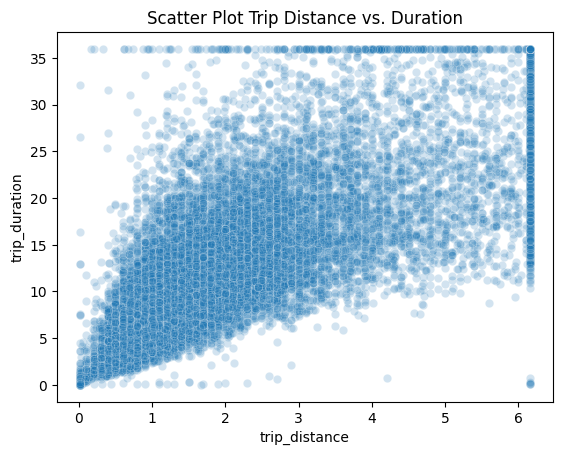

In [106]:
# Check for linear relationship between trip distance and duration
sns.scatterplot(
    data= df_edit3,
    x= 'trip_distance',
    y= 'trip_duration',
    alpha= 0.2
)

plt.title('Scatter Plot Trip Distance vs. Duration')
plt.show()

- There seems to be a linear relation between trip distance and duration, we may keep only one if we go for Multiple Linear Regression to avoid multi-collinearity.
- As we assigned limits to the outliers, they appear as concentrated on the edges of the scatter plot.

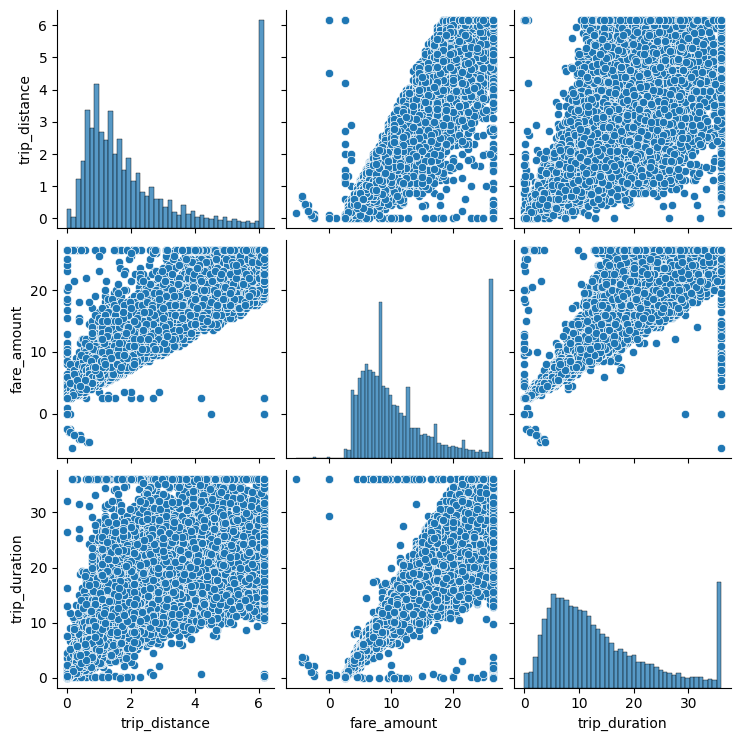

In [107]:
# Establish relationship between continuous variables
sns.pairplot(df_edit3[['trip_distance','fare_amount','trip_duration']])
plt.show()

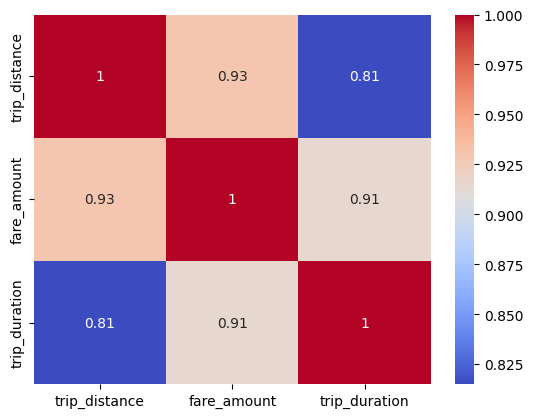

In [133]:
# Heatmap for continuous variables
corr= df_edit3[['trip_distance','fare_amount','trip_duration']].corr()
sns.heatmap(
    corr,
    annot= True,
    cmap= 'coolwarm'
)

plt.show()

All three continuous variables are linearly related to each other and each of them show a normal distribution which seems skewed to the right.

In [113]:
# Check range of values for Rate Code ID
print('Rate Code Values:',np.sort(df_edit3['RatecodeID'].unique()))
df_edit3['RatecodeID'].value_counts()

Rate Code Values: [ 1  2  3  4  5 99]


RatecodeID
1     22070
2       513
5        68
3        39
4         8
99        1
Name: count, dtype: int64

We don't have any records of Rate code = 'Group Ride', but the rest are there. 
From Data Dictionary:
>    1 = Standard rate  
>    2 = JFK  
>    3 = Newark  
>    4 = Nassau or Westchester  
>    5 = Negotiated fare  
>    6 = Group ride  
>    99 = Null/unknown

In [119]:
df_edit3.groupby(['RatecodeID'])[['trip_distance','trip_duration','fare_amount']].mean()

,trip_distance,trip_duration,fare_amount
RatecodeID,,,
1,2.219391,13.213824,11.195378
2,5.698528,31.979123,26.500000
3,5.407179,28.465872,25.692308
4,6.165000,29.597438,26.500000
5,2.586103,13.064581,21.938529
99,0.010000,0.000000,26.500000


Observations:
- Standard Rates are used on shorter trips on average.
- Special rate codes appy for JFK, Newark and Westchester, which are longer trips on average.
- The Unknown rate code record has almost 0 trip distance and duration value, but has a fare of 26.5 USD, which seems inaccurate.

In [120]:
df_edit3[df_edit3['RatecodeID'] == 99]

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,month,day
12501,1,2017-04-18 17:47:58,2017-04-18 17:47:58,0,0.01,99,N,264,264,1,26.5,0.0,0.5,0.0,0.0,0.3,78.0,0.0,Apr,Tue


In [126]:
# Remove record for Rate code 99
df_edit4 = df_edit3.drop([12501]).reset_index()
print(df_edit4.shape)
df_edit4[df_edit4['RatecodeID'] == 99]

(22698, 21)


,index,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,month,day


In [129]:
df_edit4.head()

,index,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,month,day
0,0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.067,Mar,Sat
1,1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500,Apr,Tue
2,2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200,Dec,Fri
3,3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250,May,Sun
4,4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.717,Apr,Sat


In [ ]:
# Variation in values based on source of data


#### Model Selection/Checking Assumptions

#### Model Build and Initial Assessment

#### Final Assessment and Summary